In [1]:
import torch
import os
from torchvision.models import resnet18


In [2]:
weights = 'epoch=86-step=36104.ckpt'

In [3]:
os.chdir('/src')

In [4]:
os.getcwd()

'/src'

In [5]:
os.listdir()

['downs-stream-trainier.py',
 '.gitignore',
 'requirements.txt',
 'args.json',
 'epoch=86-step=36104.ckpt',
 'notebooks',
 'logs',
 'src',
 'data',
 '.git',
 'byol-trainer.py',
 'checkpoint-download.py',
 'data-structuring.py',
 'checkpoint.ckpt',
 'test.py',
 'README.md',
 'simsiam-trainer.py']

In [6]:
model =  resnet18(num_classes=2)


In [7]:
weights = torch.load(weights,map_location=torch.device('cpu'))['state_dict']

In [8]:
weights

OrderedDict([('backbone.conv1.weight',
              tensor([[[[ 0.0497,  0.0273,  0.0202,  ...,  0.0173,  0.0005, -0.0192],
                        [-0.0135,  0.0333, -0.0048,  ..., -0.0169, -0.0115, -0.0143],
                        [ 0.0282,  0.0516, -0.0182,  ..., -0.0207, -0.0106,  0.0437],
                        ...,
                        [-0.0081, -0.0229,  0.0377,  ...,  0.0075, -0.0058, -0.0392],
                        [ 0.0092, -0.0114,  0.0103,  ...,  0.0004, -0.0120,  0.0155],
                        [ 0.0216, -0.0247, -0.0434,  ...,  0.0268,  0.0274, -0.0191]],
              
                       [[-0.0435, -0.0174, -0.0109,  ...,  0.0155, -0.0252, -0.0065],
                        [ 0.0585, -0.0143,  0.0044,  ...,  0.0600,  0.0163,  0.0295],
                        [-0.0226, -0.0431,  0.0167,  ...,  0.0564,  0.0045, -0.0035],
                        ...,
                        [-0.0248, -0.0043,  0.0332,  ...,  0.0556,  0.0188, -0.0502],
                        [ 0

In [9]:
 def parse_weights(state_dict):
    en_weights = {key[9:]: value for key, value in state_dict.items() if 'conv' in key}
    return en_weights


In [10]:
# # ultimate = parse_weights(weights)
# def parse_weights(weights):
    
#     for k in list(weights.keys()):
        
#         if k.startswith('backbo.'):
            
#             if k.startswith('backbone') and not k.startswith('backbone.fc'):
                
#                 weights[k[len("backbone."):]] = weights[k]
                
#         del weights[k]
        
#     return weights

In [21]:
weights = parse_weights(weights)

In [22]:
model.load_state_dict(weights,strict = False)

_IncompatibleKeys(missing_keys=['bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running_var', 'layer2.0.bn2.weight', 'layer2.0.bn2.bias', 'layer2.0.bn2.running_mean', 'layer2.0.bn2.running_var', 'layer2.0.downsample.0.weight', 'layer2.0.downsample.1.weight', 'layer2.0.downsample.1.bias', 'layer2.0.downsample.1.running_mean', 'layer2.0.downsample.1.running_var', 'layer2.1.bn1.weight', 'layer2.1.bn1.bias', 'layer2.1.bn1.running_mean', 'layer2.1.bn1.running_var', 'layer2.1.bn2.weight', 'lay

In [24]:
model.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[ 0.0497,  0.0273,  0.0202,  ...,  0.0173,  0.0005, -0.0192],
                        [-0.0135,  0.0333, -0.0048,  ..., -0.0169, -0.0115, -0.0143],
                        [ 0.0282,  0.0516, -0.0182,  ..., -0.0207, -0.0106,  0.0437],
                        ...,
                        [-0.0081, -0.0229,  0.0377,  ...,  0.0075, -0.0058, -0.0392],
                        [ 0.0092, -0.0114,  0.0103,  ...,  0.0004, -0.0120,  0.0155],
                        [ 0.0216, -0.0247, -0.0434,  ...,  0.0268,  0.0274, -0.0191]],
              
                       [[-0.0435, -0.0174, -0.0109,  ...,  0.0155, -0.0252, -0.0065],
                        [ 0.0585, -0.0143,  0.0044,  ...,  0.0600,  0.0163,  0.0295],
                        [-0.0226, -0.0431,  0.0167,  ...,  0.0564,  0.0045, -0.0035],
                        ...,
                        [-0.0248, -0.0043,  0.0332,  ...,  0.0556,  0.0188, -0.0502],
                        [ 0.0178, -0

In [23]:
model.fc.weight

Parameter containing:
tensor([[ 3.3792e-02,  2.5310e-02, -1.5456e-02,  ...,  1.7305e-02,
         -1.8032e-02,  2.4972e-02],
        [ 3.6331e-02,  3.6873e-05, -3.7121e-04,  ..., -1.0536e-02,
          2.7748e-03,  3.5303e-02]], requires_grad=True)

In [22]:
for name, param in model.named_parameters():
    if name not in ['fc.weight', 'fc.bias']:
        param.requires_grad = False

In [20]:
nSamples = [887, 6130, 480, 317, 972, 101, 128]
normedWeights = [1 -(x / sum(nSamples)) for x in nSamples]

In [23]:
sum(normedWeights)

6.0

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from torchmetrics.functional import confusion_matrix, 
import torch

In [12]:
np.random.RandomState(3)
y_actual = torch.randint(2,(500,))
y_pred = torch.randint(2,(500,))

In [14]:
conf = confusion_matrix(y_pred,y_actual,num_classes=2)

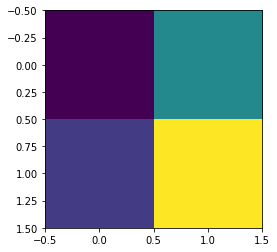

In [16]:
plt.imshow(conf)

In [17]:
pip install seaborn

ModuleNotFoundError: No module named 'seaborn'

In [228]:
from torchvision.models import resnet18
import torch.nn as nn
import matplotlib.pyplot as plt

In [231]:
model = resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features,2)


In [230]:
ct = 0
for child in model.children():
    ct += 1
    if ct <= 6:
        #print(ct)
        #print(child)
        #print('------------------------------------------------------')
        for param in child.parameters():
            param.requires_grad = False


In [9]:
def count_parameters(model) -> int:
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [223]:
count_parameters(model)/1000000


10.494466

In [227]:
model.layer1[0].conv1.weight[0].shape

torch.Size([64, 3, 3])

In [232]:
!ls /root/.cache/torch/hub/checkpoints/


resnet18-f37072fd.pth


In [233]:

model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the 49 conv layers in this list
# get all the model children as list
model_children = list(model.children())

In [234]:
counter = 0 
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 17


In [235]:
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) ====> SHAPE: torch.Size([64, 3, 7, 7])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([128, 64, 3, 3])
CONV: Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([128, 128, 3, 3])
CONV: Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([128, 128, 3, 3])


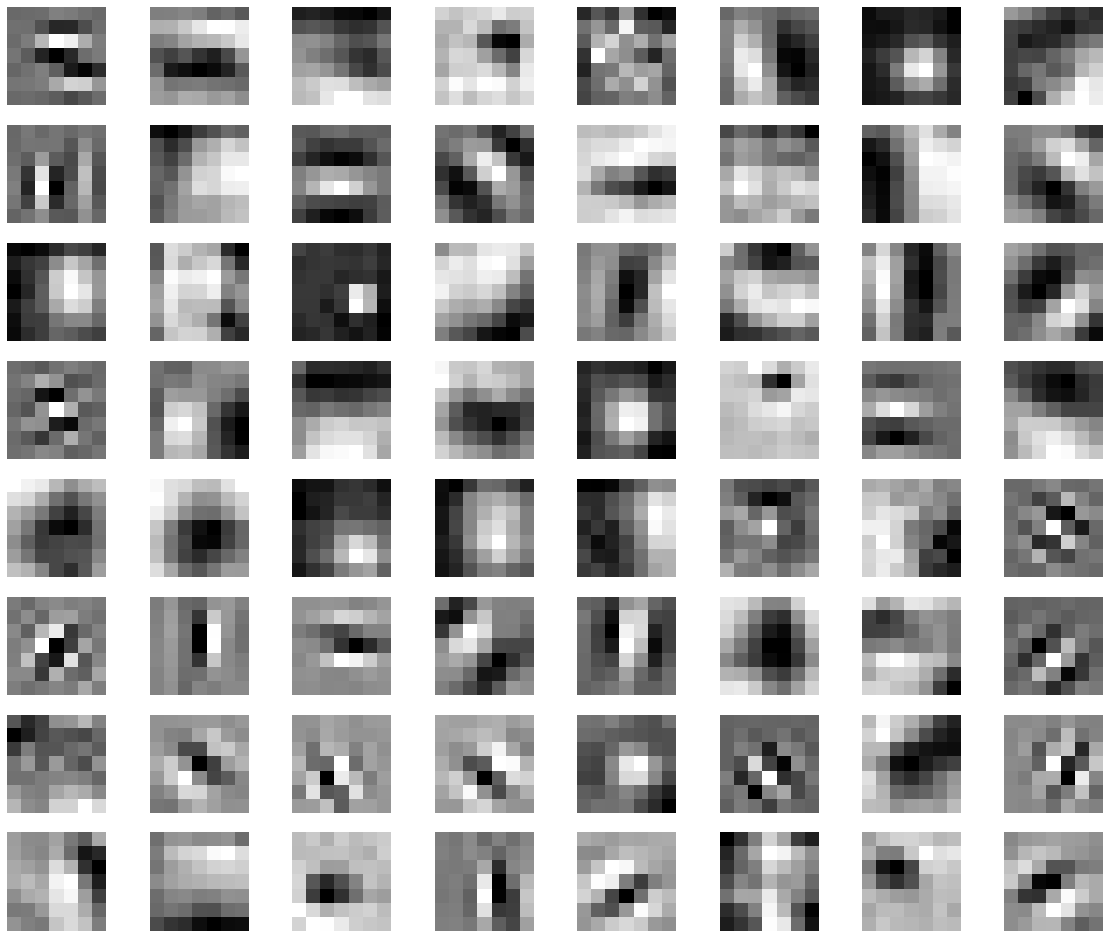

In [237]:
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    plt.savefig('./filter.png')
plt.show()

In [2083]:

import torch

import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image



defualt_transforms = T.Compose([T.Resize((300,300)),
                                T.RandomApply([T.RandomRotation(degrees=(10)), 
                                               T.RandomAffine(degrees=0, shear=20, scale=(1,1))], p=1),
                                T.RandomHorizontalFlip(p=0.5),
                                T.RandomApply([T.ColorJitter(brightness=0.5, hue=.3),
                                    T.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 5))], p= 5),
                                T.ToTensor(),
                                T.Normalize(mean=torch.tensor([0.1123,0.1123,0.1123]),
                                            std=torch.tensor([0.1228,0.1228,0.1228])) 
                        ])

os.getcwd()

'/src'

In [2114]:
image_path = './data/down-stream/grading/MRO/train/severe/10216.jpg'

In [2115]:
image = Image.open(image_path)

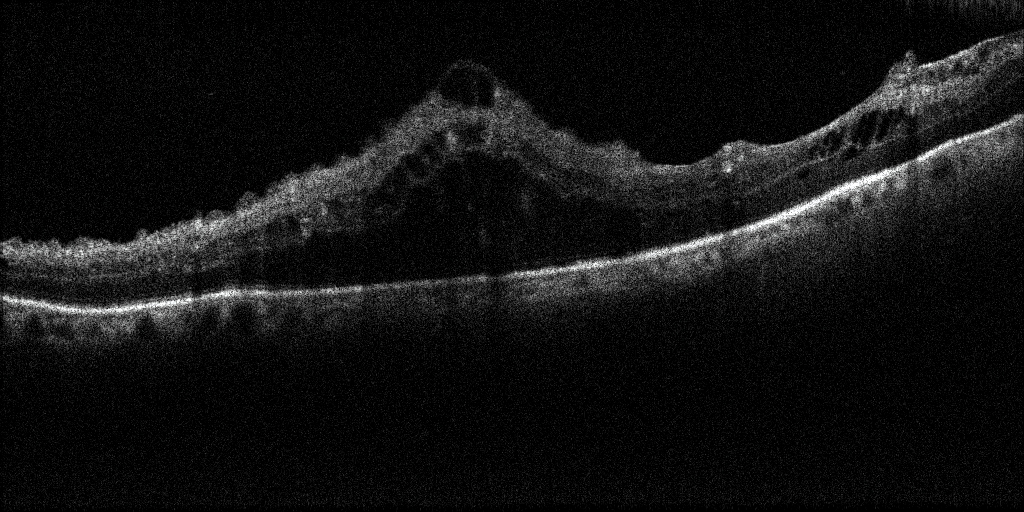

In [2116]:
image

In [2117]:
defualt_transforms(image)

tensor([[[-0.6910, -0.7229, -0.6910,  ..., -0.9145, -0.9145, -0.9145],
         [-0.7548, -0.7548, -0.7229,  ..., -0.9145, -0.9145, -0.9145],
         [-0.7548, -0.7868, -0.7548,  ..., -0.9145, -0.9145, -0.9145],
         ...,
         [-0.9145, -0.9145, -0.9145,  ..., -0.6590, -0.6590, -0.6590],
         [-0.9145, -0.9145, -0.9145,  ..., -0.6910, -0.7229, -0.7229],
         [-0.9145, -0.9145, -0.9145,  ..., -0.7229, -0.7548, -0.7548]],

        [[-0.6910, -0.7229, -0.6910,  ..., -0.9145, -0.9145, -0.9145],
         [-0.7548, -0.7548, -0.7229,  ..., -0.9145, -0.9145, -0.9145],
         [-0.7548, -0.7868, -0.7548,  ..., -0.9145, -0.9145, -0.9145],
         ...,
         [-0.9145, -0.9145, -0.9145,  ..., -0.6590, -0.6590, -0.6590],
         [-0.9145, -0.9145, -0.9145,  ..., -0.6910, -0.7229, -0.7229],
         [-0.9145, -0.9145, -0.9145,  ..., -0.7229, -0.7548, -0.7548]],

        [[-0.6910, -0.7229, -0.6910,  ..., -0.9145, -0.9145, -0.9145],
         [-0.7548, -0.7548, -0.7229,  ..., -0

In [2136]:
x=defualt_transforms(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


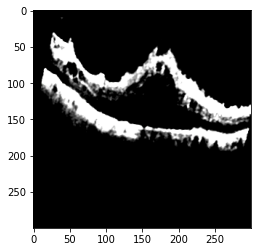

In [2137]:
plt.imshow(x.permute(1,2,0))

In [2113]:
x

tensor([[[-0.7229, -0.7229, -0.6910,  ..., -0.9145, -0.9145, -0.9145],
         [-0.7548, -0.7548, -0.7229,  ..., -0.9145, -0.9145, -0.9145],
         [-0.6910, -0.7229, -0.6910,  ..., -0.9145, -0.9145, -0.9145],
         ...,
         [-0.9145, -0.9145, -0.9145,  ..., -0.6910, -0.6590, -0.6590],
         [-0.9145, -0.9145, -0.9145,  ..., -0.6271, -0.6590, -0.6590],
         [-0.9145, -0.9145, -0.9145,  ..., -0.5951, -0.6271, -0.5951]],

        [[-0.7229, -0.7229, -0.6910,  ..., -0.9145, -0.9145, -0.9145],
         [-0.7548, -0.7548, -0.7229,  ..., -0.9145, -0.9145, -0.9145],
         [-0.6910, -0.7229, -0.6910,  ..., -0.9145, -0.9145, -0.9145],
         ...,
         [-0.9145, -0.9145, -0.9145,  ..., -0.6910, -0.6590, -0.6590],
         [-0.9145, -0.9145, -0.9145,  ..., -0.6271, -0.6590, -0.6590],
         [-0.9145, -0.9145, -0.9145,  ..., -0.5951, -0.6271, -0.5951]],

        [[-0.7229, -0.7229, -0.6910,  ..., -0.9145, -0.9145, -0.9145],
         [-0.7548, -0.7548, -0.7229,  ..., -0

In [79]:
from torchvision.models import resnet18
import torch.nn as nn

In [80]:
model = resnet18(pretrained=False)

In [84]:
model.fc = nn.Linear(model.fc.in_features,1000000)

In [85]:
model.fc

Linear(in_features=512, out_features=1000000, bias=True)

In [86]:
count_parameters(model)

524176512